In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    "E:\\Workspace\\jupyter_notebook\\notebook_idata_lesson01\\KNN\\wine_data.csv",
    header=None,  # 指定哪一行是列名，这里我们指定没有行作为列名
    usecols=[0, 1, 2]  # 只用0,1,2列
)
# 指定列名
df.columns = ["Class label", "Alcohol", "Malic acid"]

df.head()


,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [25]:
from sklearn import preprocessing

# 0-1标准化
std_scale = preprocessing.StandardScaler().fit(df[["Alcohol", "Malic acid"]])
df_std = std_scale.transform(df[["Alcohol", "Malic acid"]])
print("Mean after standardization:Alcohol={:.2f},Malic acid={:.2f}".format(df_std[:, 0].mean(), df_std[:, 1].mean()))
print("Standard deviation after standardization:Alcohol={:.2f},Malic acid={:.2f}".format(df_std[:, 0].std(),
                                                                                         df_std[:, 1].std()))

# 0-1归一化
minmax_scale = preprocessing.MinMaxScaler().fit(df[["Alcohol", "Malic acid"]])
df_minmax = minmax_scale.transform(df[["Alcohol", "Malic acid"]])
print("Min-value after min-max scaling:Alcohol={:.2f},Malic acid={:.2f}".format(df_minmax[:, 0].min(),
                                                                                df_minmax[:, 1].min()))
print("Max-value after min-max scaling:Alcohol={:.2f},Malic acid={:.2f}".format(df_minmax[:, 0].max(),
                                                                                df_minmax[:, 1].max()))


Mean after standardization:Alcohol=-0.00,Malic acid=-0.00
Standard deviation after standardization:Alcohol=1.00,Malic acid=1.00
Min-value after min-max scaling:Alcohol=0.00,Malic acid=0.00
Max-value after min-max scaling:Alcohol=1.00,Malic acid=1.00


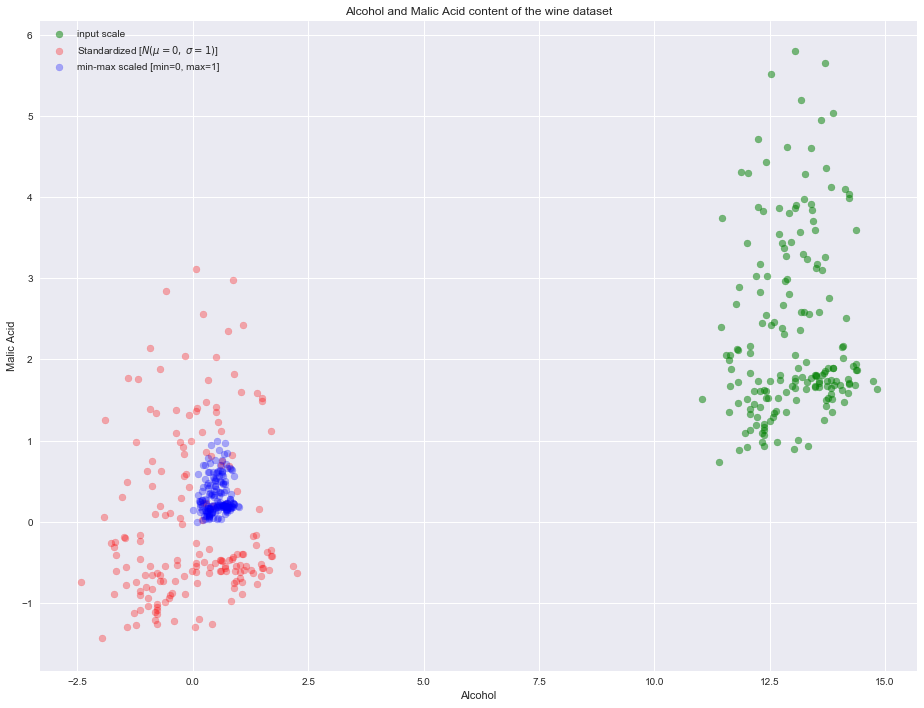

In [32]:
from matplotlib import pyplot as plt
# 图表输出在output内
% matplotlib inline
import seaborn as sns

sns.set()

def plot():
    plt.figure(figsize=(13, 10))

    # 画出没有处理过的数据
    plt.scatter(df["Alcohol"], df["Malic acid"], color="green", label="input scale", alpha=0.5)

    # 0-1标准化过的数据
    plt.scatter(df_std[:, 0], df_std[:, 1], color="red", label="Standardized [$N  (\mu=0, \; \sigma=1)$]", alpha=0.3)

    # 0-1归一化过的数据
    plt.scatter(df_minmax[:, 0], df_minmax[:, 1], color="blue", label="min-max scaled [min=0, max=1]", alpha=0.3)

    plt.title("Alcohol and Malic Acid content of the wine dataset")
    plt.xlabel("Alcohol")
    plt.ylabel("Malic Acid")
    plt.legend(loc="best")

    plt.tight_layout()

plot()
plt.show()


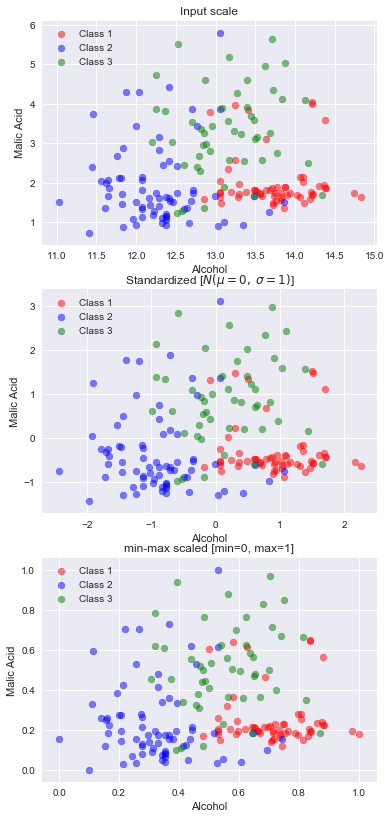

In [35]:
# 原始数据中数据的分布情况
fig, ax = plt.subplots(3, figsize=(6, 14))
for a, d, l in zip(range(len(ax)), (df[["Alcohol", "Malic acid"]].values, df_std, df_minmax),
                   ("Input scale", "Standardized [$N  (\mu=0, \; \sigma=1)$]", "min-max scaled [min=0, max=1]")):
    for i, c in zip(range(1, 4), ("red", "blue", "green")):
        ax[a].scatter(d[df["Class label"].values == i, 0], d[df["Class label"].values == i, 1], alpha=0.5, color=c,
                      label="Class %s" % i)

    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')

plt.show()

# 可以看到三种数据，不管处理还是没处理过，数据的分布还是一样的
